# Sentinel 5P NO2 Data Processing Pipeline #2D (NO2 Visualization)

## Import NO2 tools

In [116]:
from s5p_no2_tools import plot_maps, date_from_week, add_days
import pandas as pd

## Set up project information

In [117]:
country_file_string = 'thailand'
iso3 = 'THA'
week_list = ['2019-W01','2019-W06','2019-W11','2019-W17','2020-W01','2020-W06','2020-W11','2020-W17']
working_directory = 'projects/thailand'
country_name = 'Thailand'

In [118]:
country_name

'Thailand'

## Read NO2 data

In [119]:
file_list = []
for week in week_list:
    filename = working_directory+'/'+country_file_string+'-'+week+'_gdf.pickle'
    print(filename)
    file_list.append(filename)

projects/thailand/thailand-2019-W01_gdf.pickle
projects/thailand/thailand-2019-W06_gdf.pickle
projects/thailand/thailand-2019-W11_gdf.pickle
projects/thailand/thailand-2019-W17_gdf.pickle
projects/thailand/thailand-2020-W01_gdf.pickle
projects/thailand/thailand-2020-W06_gdf.pickle
projects/thailand/thailand-2020-W11_gdf.pickle
projects/thailand/thailand-2020-W17_gdf.pickle


In [120]:
file_list

['projects/thailand/thailand-2019-W01_gdf.pickle',
 'projects/thailand/thailand-2019-W06_gdf.pickle',
 'projects/thailand/thailand-2019-W11_gdf.pickle',
 'projects/thailand/thailand-2019-W17_gdf.pickle',
 'projects/thailand/thailand-2020-W01_gdf.pickle',
 'projects/thailand/thailand-2020-W06_gdf.pickle',
 'projects/thailand/thailand-2020-W11_gdf.pickle',
 'projects/thailand/thailand-2020-W17_gdf.pickle']

## Read target place polygon

In [121]:
asia1_gdf = pd.read_pickle('data/asia1_gdf.pickle')

In [122]:
country_gdf1 = asia1_gdf[asia1_gdf['name']=='Thailand']

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [124]:
gdf_list = []
week_list = []
for file in file_list:
    gdf = pd.read_pickle(file).set_geometry('geometry')
    weekname = list(gdf['week'].unique())[0]
    print(weekname)
    #week_list = week_list.append(weekname)
    #startDate, endDate = add_days(start=date_from_week(weekstring=weekname),numDays=7)
    gdf_list.append(gdf)

2019-W01
2019-W06
2019-W11
2019-W17
2020-W01
2020-W06
2020-W11
2020-W17


In [125]:
gdf_list[0]['week']

904235     2019-W01
904236     2019-W01
904237     2019-W01
904238     2019-W01
904239     2019-W01
             ...   
1016200    2019-W01
1016201    2019-W01
1016202    2019-W01
1016203    2019-W01
1016204    2019-W01
Name: week, Length: 565744, dtype: object

In [126]:
gdf_list[7]['week']

786340    2020-W17
786341    2020-W17
786784    2020-W17
786785    2020-W17
786786    2020-W17
            ...   
928454    2020-W17
928455    2020-W17
928900    2020-W17
928901    2020-W17
928902    2020-W17
Name: week, Length: 675690, dtype: object

## Set up sensing date section of figure title

In [127]:
import numpy as np
date_vmax1 = []
date_vmin1 = []
date_vmax2 = []
date_vmin2 = []
for gdf in gdf_list:
    year = list(gdf['week'].unique())[0][0:4]
    if year == '2019':
        date_vmin1.append(gdf['DateTime'].min())
        date_vmax1.append(gdf['DateTime'].max())
    if year == '2020':
        date_vmin2.append(gdf['DateTime'].max())
        date_vmax2.append(gdf['DateTime'].max())
    #date_vmin1.append(gdf[gdf['Date'][0:3]=='2020','DateTime'].min())
vmin_date1 = min(date_vmin1).strftime("%Y-%m-%d")
vmax_date1 = max(date_vmax1).strftime("%Y-%m-%d")
vmin_date2 = min(date_vmin2).strftime("%Y-%m-%d")
vmax_date2 = max(date_vmax2).strftime("%Y-%m-%d")

sensing_dates = vmin_date1+' to '+vmax_date1+' and '+vmin_date2+' to '+vmax_date2

## Select NO2 data column to use, colormap value

You can review the colormap in Notebook 3: [`NB03-S5P-TROPOMI-S5P-API-Test.ipynb`](./NB03-S5P-TROPOMI-S5P-API-Test.ipynb).

In [128]:
column='nitrogendioxide_tropospheric_column_precision_kernel'
country_name = list(country_gdf1.loc[country_gdf1['iso3']==iso3,'name'].unique())[0]
colormap = 'OrRd'

## Set up min, max of selected column

In [129]:
no2_vmax = []
no2_vmin = []
for gdf in gdf_list:
    no2_vmax.append(gdf[column].max())
    no2_vmin.append(gdf[column].min())
vmax_no2 = max(no2_vmax)
vmin_no2 = min(no2_vmin)

## Set up subplot titles

In [130]:
period_list = []
for gdf in gdf_list:
    weekname = list(gdf['week'].unique())[0]
    startDate, endDate = add_days(start=date_from_week(weekstring=weekname),numDays=14)
    period = startDate+' to '+endDate
    period_list.append(period)
print(period_list)

['2019-01-07 to 2019-01-21', '2019-02-11 to 2019-02-25', '2019-03-18 to 2019-04-01', '2019-04-29 to 2019-05-13', '2020-01-06 to 2020-01-20', '2020-02-10 to 2020-02-24', '2020-03-16 to 2020-03-30', '2020-04-27 to 2020-05-11']


## Draw 1 test subplot

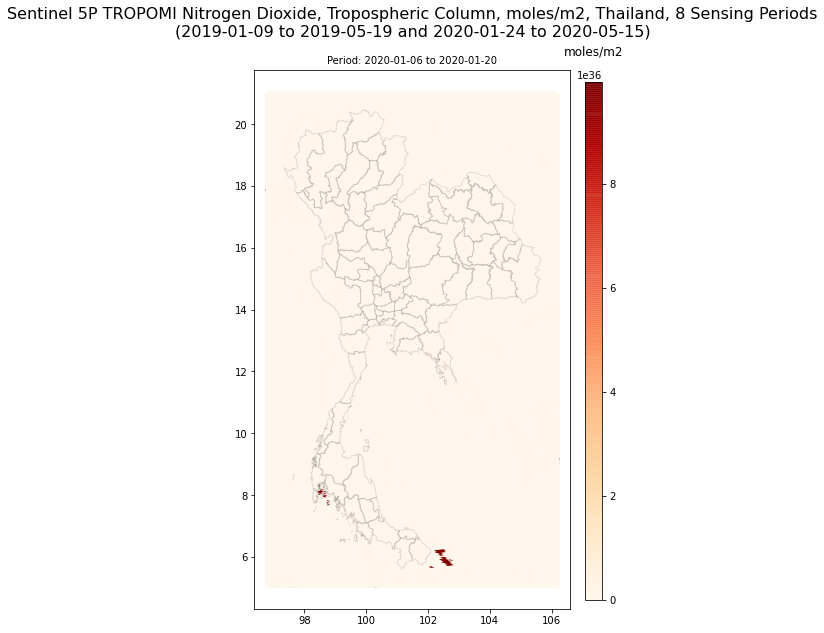

CPU times: user 46.3 s, sys: 224 ms, total: 46.5 s
Wall time: 44.1 s


In [131]:
%%time
fig, ax = plt.subplots(figsize=(12,8), constrained_layout=True)
gdf_list[4].plot(cmap=plt.get_cmap(colormap), ax=ax, column=column, \
                 vmin=vmin_no2, vmax=vmax_no2, alpha=0.9)
ax.set_title('Period: '+period_list[4], fontsize=10)
country_gdf1.plot(ax=ax, alpha=0.1, color='None')
im = plt.gca().get_children()[0]
left=0.7    # towards 1, shift to right
bottom=0.05 # towards 0, shift to bottom
width=0.02
height=0.9
cax = fig.add_axes([left,bottom,width,height])
cax.set_title('moles/m2',y=1.04)
fig.colorbar(im, cax=cax)
plt.suptitle(t='Sentinel 5P TROPOMI Nitrogen Dioxide, Tropospheric Column, moles/m2, '+\
             country_name+', 8 Sensing Periods\n('+sensing_dates+')', x=0.5, y=1.08, fontsize=16)

plt.show()

## Draw subplots

Drawing the subplots will take a while (10-12 minutes). It will also use up memory.

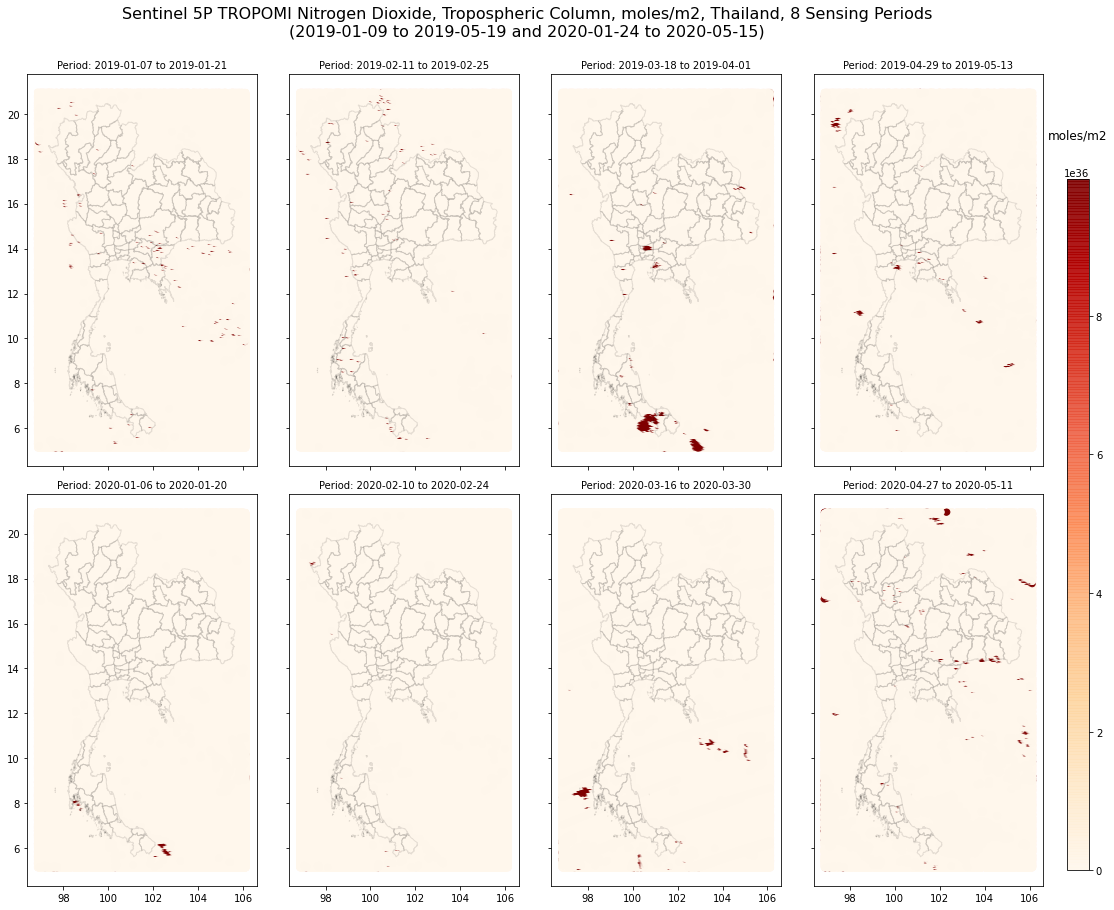

CPU times: user 13min 3s, sys: 4.82 s, total: 13min 8s
Wall time: 12min 52s


In [132]:
%%time
nrows=2
ncols=4
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, sharex=True, sharey=True, figsize=(15,12))
i=0
# for gdf in gdf_list:
for row in range(0, nrows):
    for col in range(0, ncols):
        gdf_list[i].plot(cmap=plt.get_cmap(colormap), ax=axes[row,col],
                 column=column, vmin=vmin_no2, vmax=vmax_no2, alpha=0.9)
        country_gdf1.plot(ax=axes[row,col], alpha=0.1, color='None')
        axes[row,col].set_title('Period: '+period_list[i], fontsize=10)
        i=i+1
plt.tight_layout()
im = plt.gca().get_children()[0]
left=1.0    # towards 1, shift to right
bottom=0.05 # towards 0, shift to bottom
width=0.02
height=0.8
cax = fig.add_axes([left,bottom,width,height]) 
cax.set_title('moles/m2', y=1.05)
fig.colorbar(im, cax=cax)

plt.suptitle(t='Sentinel 5P TROPOMI Nitrogen Dioxide, Tropospheric Column, moles/m2, '+\
             country_name+', 8 Sensing Periods\n('+sensing_dates+')', x=0.5, y=1.05, fontsize=16)
plt.show()

## Congratulations!

You have just completed a remote sensing project using Pipeline 2. We hope it was worth your time and effort!